In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importing dataset

suicideRate=pd.read_csv('/content/drive/MyDrive/Projects/India Suicide Rate - EDA/Suicides in India 2001-2012.csv')
suicideRate

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [4]:
#Dataset info

suicideRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
#Removing age Group 100+
#Removing Total death is 0
#As the values are not clear in States

suicideRate=suicideRate[suicideRate['Total']!='0']
suicideRate=suicideRate[suicideRate['Age_group']!='0-100+']
suicideRate

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237504,West Bengal,2012,Professional_Profile,Farming/Agriculture Activity,Male,60+,0
237505,West Bengal,2012,Professional_Profile,Student,Male,60+,0
237506,West Bengal,2012,Professional_Profile,Service (Private),Male,60+,0
237507,West Bengal,2012,Professional_Profile,Professional Activity,Male,60+,0


In [6]:
#Checking duplicates

suicideRate.duplicated().sum()

0

1. There is no Duplicate values

In [7]:
#States where Suicide records are created

suicideRate['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [8]:
suicideRate.shape

(225663, 7)

In [9]:
#Total SUicides acording to each state

suicideRate.groupby(by=suicideRate['State']).sum()[['Total']].sort_values(by='Total',ascending=False).reset_index()

,State,Total
0,Maharashtra,541167
1,West Bengal,497962
2,Tamil Nadu,491065
3,Andhra Pradesh,488419
4,Karnataka,440895
5,Kerala,323074
6,Madhya Pradesh,270921
7,Gujarat,198504
8,Chhattisgarh,181364
9,Odisha,160338


OBSERVATION
1. Maharashtra, WestBengal, TamilNadu have the top 3 places in Suicide Death

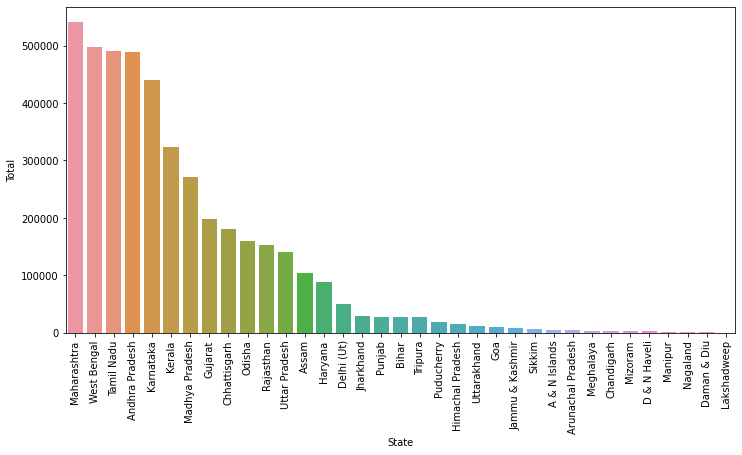

In [12]:
#Ploting States with Total deaths

data=suicideRate.groupby(by='State').sum()[['Total']].reset_index().sort_values(by='Total',ascending=False)
fig=plt.figure(figsize=(12,6))
ax=sns.barplot(data=data,x='State',y='Total')
ax=plt.xticks(rotation=90)


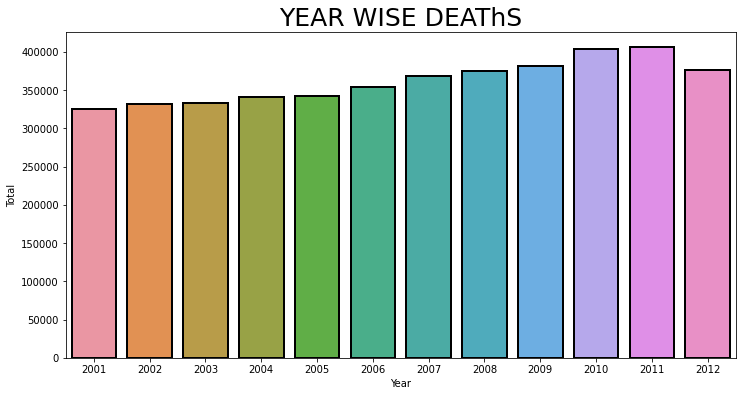

In [13]:
#Yearwise Total Count of Deaths

X=suicideRate.groupby(by='Year')['Total'].sum().reset_index().sort_values(by='Year',ascending=True)
fig=plt.figure(figsize=(12,6))
plt.title('YEAR WISE DEATHS',size=25)
ax=sns.barplot(data=X,x='Year',y='Total',linewidth=2,edgecolor='black')

OBSERVATION:
1. The Suicide death rate is increasing every year
2. Year 2010 & 2011 has the Highest suicide death

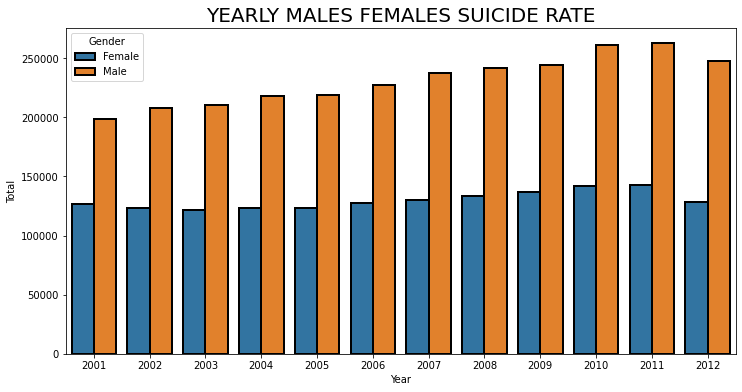

In [14]:
#Yearly Males Females Suicide Rate

X=suicideRate.groupby(by=['Year','Gender']).sum()[['Total']].reset_index().sort_values(by='Year',ascending=True)
fig=plt.figure(figsize=(12,6))
plt.title('YEARLY MALES FEMALES SUICIDE RATE',SIZE=20)
ax=sns.barplot(data=X,x='Year',y='Total',hue='Gender',linewidth=2,edgecolor='black')

OBSERVATION:
1. Comparing with females, Males have high suicide death Rates in each year
2. Females have approximately same suicide death in each year

In [15]:
reasons=suicideRate[suicideRate['Type_code']=='Causes']
reasons['Type'].value_counts()

Illness (Aids/STD)                                4200
Love Affairs                                      4200
Paralysis                                         4200
Suspected/Illicit Relation                        4200
Cancer                                            4200
Death of Dear Person                              4200
Poverty                                           4200
Other Causes (Please Specity)                     4200
Unemployment                                      4200
Causes Not known                                  4200
Drug Abuse/Addiction                              4200
Divorce                                           4200
Professional/Career Problem                       4200
Insanity/Mental Illness                           4200
Failure in Examination                            4200
Illegitimate Pregnancy                            4200
Fall in Social Reputation                         4200
Property Dispute                                  4200
Other Prol

In [ ]:
#Renaming the columns which have spelling mistakes , same meanings

reasons.loc[reasons['Type']=='Bankruptcy or Sudden change in Economic','Type']='Bankruptcy'
reasons.loc[reasons['Type']=='Bankruptcy or Sudden change in Economic Status','Type']='Bankruptcy'
reasons.loc[reasons['Type']=='Not having Children(Barrenness/Impotency','Type']='Infertility'
reasons.loc[reasons['Type']=='Not having Children (Barrenness/Impotency','Type']='Infertility'
reasons.loc[reasons['Type']=='Other Causes (Please Specity)','Type']='Unknown'
reasons.loc[reasons['Type']=='Causes Not known','Type']='Unknown'
reasons['Type'].value_counts()

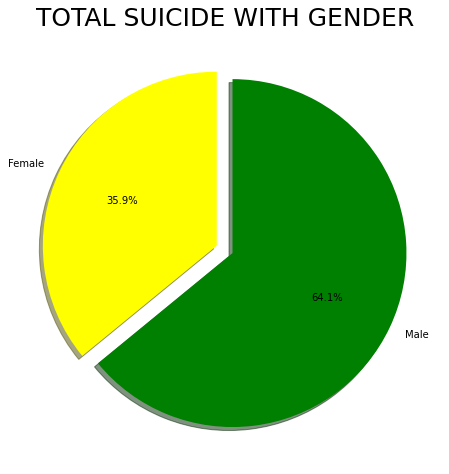

In [35]:
#Pie Plot Showing Total Suicides with Gender

Category=reasons.groupby(by='Gender').sum()['Total']
labels=['Female','Male']
fig=plt.figure(figsize=(12,8))
plt.title('TOTAL SUICIDE WITH GENDER',size=25)
ax=plt.pie(Category,labels=labels,explode=(0.05,.05),colors=('yellow','green'),autopct="%1.1f%%",shadow=True,startangle=90)



OBSERVATION:
1. Male have higher suicide death rate than Females

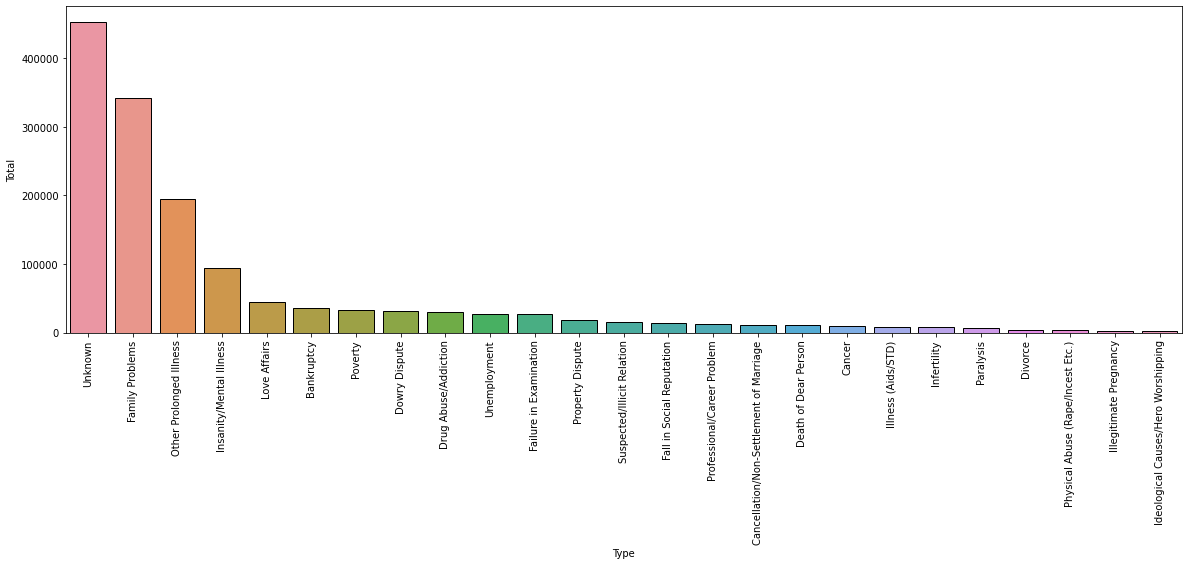

In [17]:
#Death rate with causes

X=reasons.groupby(by=['Type']).sum()[['Total']].reset_index().sort_values(by='Total',ascending=False)
fig=plt.figure(figsize=(20,6))
ax=sns.barplot(data=X,x='Type',y='Total',linewidth=1,edgecolor='black')
ax=plt.xticks(rotation=90)

OBSERVATION:
1. Family problem has high suicides rate

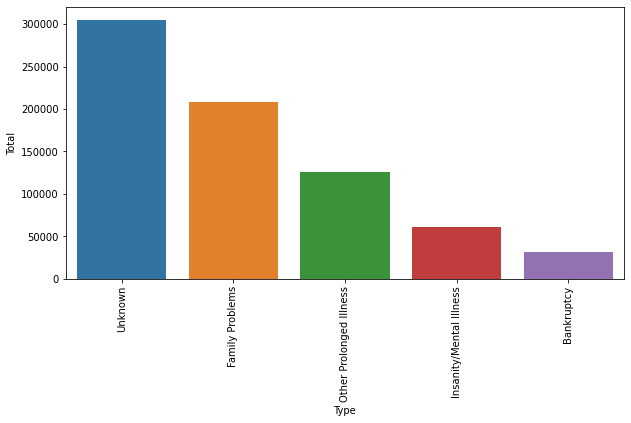

In [18]:
#Top 5 causes for mens suicide

male=reasons[reasons['Gender']=='Male']
X=male.groupby(by='Type').sum()[['Total']].reset_index().sort_values(by='Total',ascending=False)
fig=plt.figure(figsize=(10,5))
ax=sns.barplot(data=X[:5],x='Type',y='Total')
ax=plt.xticks(rotation=90)


1. Family problems is the main reason for Males suicide

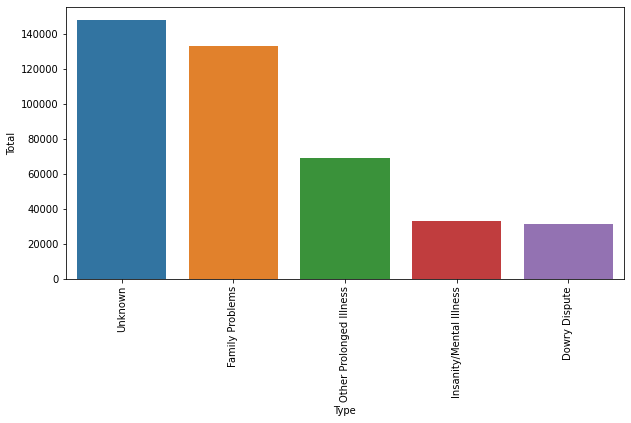

In [19]:
#Top 5 Causes for females suicide

female=reasons[reasons['Gender']=="Female"]
X1=female.groupby(by='Type').sum()[['Total']].reset_index().sort_values(by='Total',ascending=False)
fig=plt.figure(figsize=(10,5))
ax=sns.barplot(data=X1[:5],x='Type',y='Total')
ax=plt.xticks(rotation=90)


OBSERVATION:
1. Family problems is the main reason for Female suicide compared to Male
2. Even dowry makes many Females to suicide 

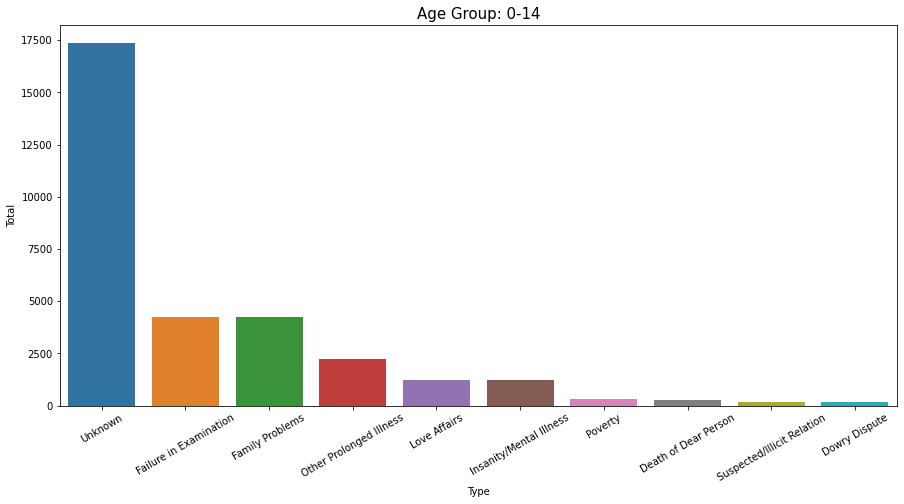

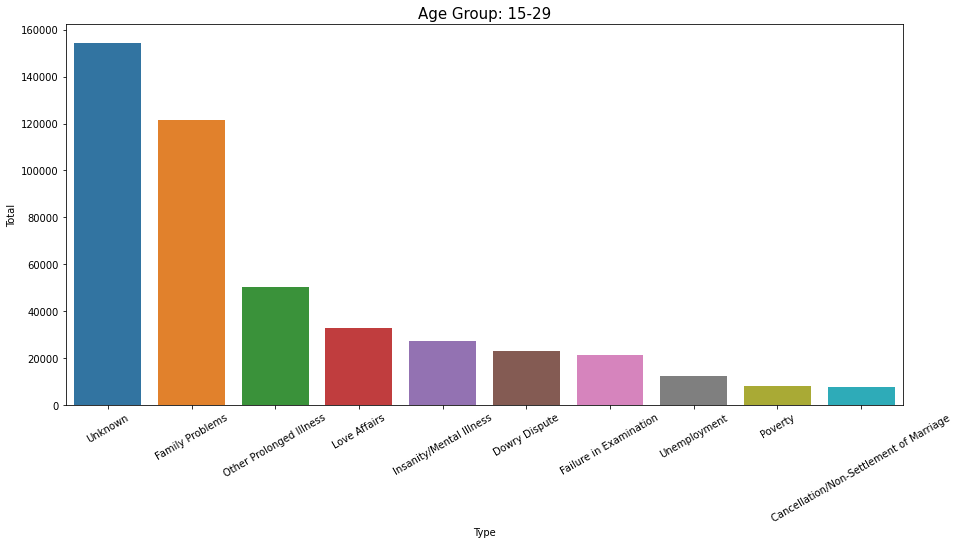

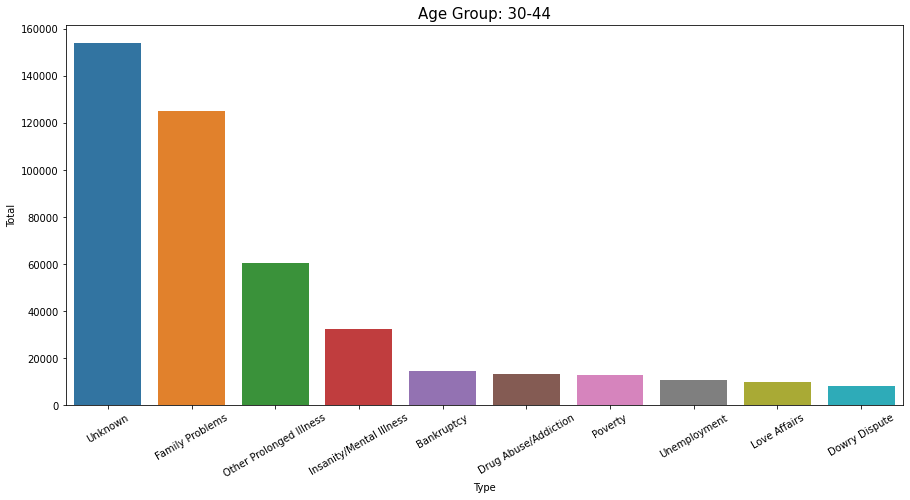

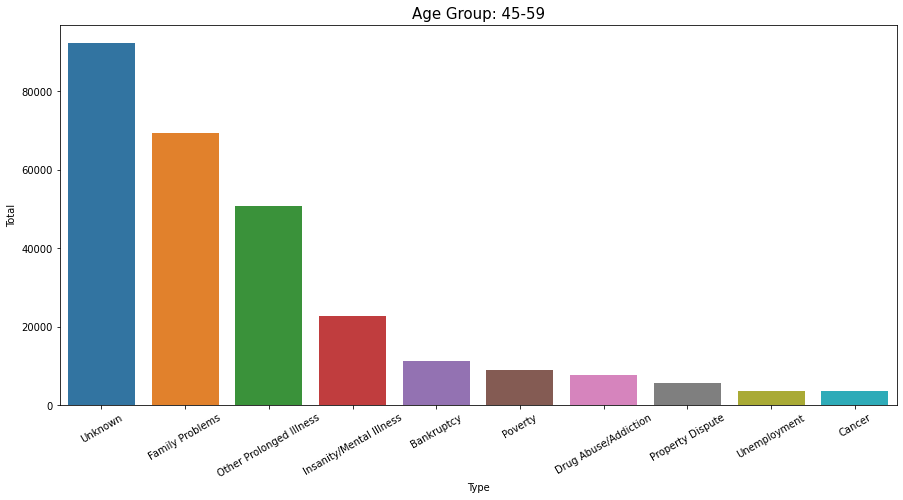

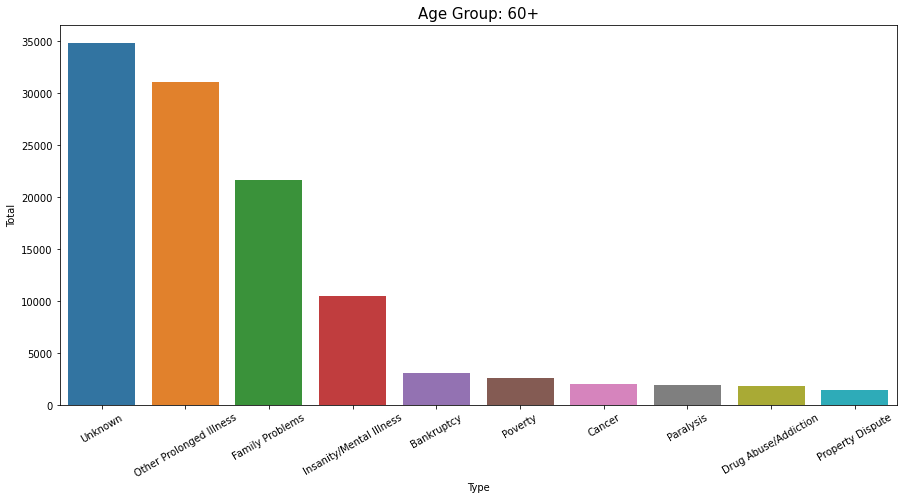

In [48]:
#Top 10 Causes of Suicide with Age Groups

Age=reasons['Age_group'].value_counts().index
Age=list(Age)
for x in Age:
  reasons1=reasons[reasons['Age_group']==x]
  fig=plt.figure(figsize=(15,7))
  plt.title('Age Group: '+x,size=15)
  Age1=reasons1.groupby(by='Type').sum()[['Total']].sort_values(by='Total',ascending=False).reset_index()
  ax=sns.barplot(data=Age1[:10],x='Type',y='Total')
  ax=plt.xticks(rotation=30)


OBSERVATION:
1. Mainly School students are suiciding because of exam failures, parents should encourage them.
2. Love affair and Family problems are main cause of Teenager suicide death, better dont love.
3. Bankruptsy and Family problems are main reason for adults deaths, Get more knowlege in financing and savings, face your family problems. 

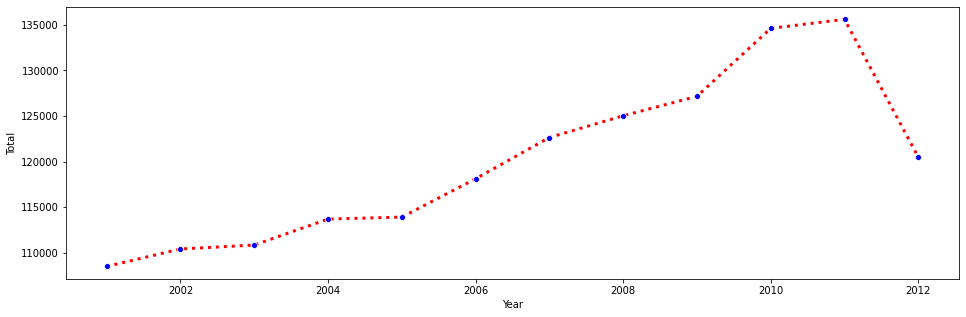

In [47]:
#Total death with year

X=reasons.groupby(by='Year').sum()[['Total']].reset_index().sort_values(by="Year",ascending=True)
fig=plt.figure(figsize=(16,5))
ax=sns.lineplot(data=X,x='Year',y='Total',linestyle=':',linewidth=3,color='red',marker='o',markerfacecolor='blue')

OBSERVATION:
1. Each year Total suicide death are increasing very high 
2. After 2011 the suicide rate is decreasing